**In this Notebook we work on Titanic passengers database and make predictions on their survival in the mishap**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


**Explore the data.**

In [2]:
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the data**

In [4]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


**Look at labeled data of both training and evaluation set**

In [5]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [6]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

**Distribution of age of passengers**

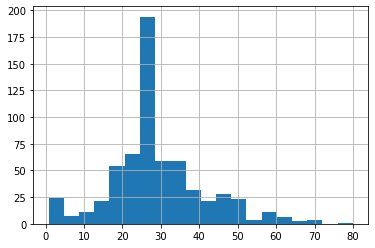

In [7]:
dftrain.age.hist(bins=20)
plt.show()


**Make some observations on the unfortundate :( data set**

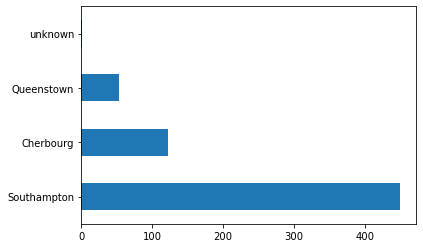

In [8]:
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()


**Survived Passengers for each class**

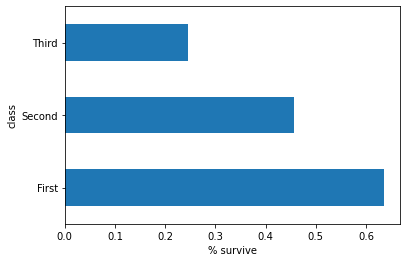

In [9]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


**Changing Categorial features to numerical features**

In [10]:
# Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=True)# X head
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=True)
dftrain.shape
dfeval.shape
dftrain = dftrain.drop(columns="deck_G")


In [11]:
dftrain.shape

(627, 17)

In [12]:
dfeval.shape


(264, 17)

In [13]:
df = pd.concat((dftrain, dfeval), axis = 0)
y = pd.concat((y_train, y_eval), axis = 0)

**Decision Tree Classification**

In [14]:
dtc = DecisionTreeClassifier(max_depth=1,random_state = 42)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7424242424242424


Thus decision three with depth one yields accuracy of 74.24%

**GridSearch Cross Validation for Decision Tree**

In [15]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {"max_depth": np.array(range(3,300,3)),
              #"max_features": ["auto", "sqrt", "log2"],
              #"splitter": ["best", "Random"],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(dtc, param_grid)
grid_search.fit(dftrain, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

Through GridSearchCV we can increase the accuracy by tuning the hyperparameters. GridSearchCV fits the model to training set and checks the crossvalidation score with max_depth from 3 to 300 with interval of 3. It also checks the each of the depth with criterion and obtains the best parameter to identify best accuracy. Here tuned hyperparameters are as follows:

criterion = 'entropy'

max_depth = 3

In [16]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 42)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7954545454545454


We can observe that the training accuracy is increased from 74.24% to 79.54%. **That's more than 5% increase.**

**RandomizedSearch CV for Decision Tree**

In [17]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, 30,100,300,600,900],
              "criterion": ["gini", "entropy"]}
random_search = RandomizedSearchCV(dtc, param_dist)
random_search.fit(df, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 30, 100, 300, 600,
                                                      900]})

As GridSearchCV fit model through all the parameters, it is obvious that it will take more time. However, with RandomizedSearch CV we check the model to a few point and it results in much shorter processing time. 

In [18]:
random_search.best_params_

{'max_depth': 3, 'criterion': 'gini'}

Best parameter obtained from RandomSearchCV may not exactly the same as GridSearchCV and not be the most optimized. However, they are a good starting point. Through Randomized Search what we obtained is as follows:

Maximum Depth of tree = 3

Criterion = Entropy

Note that the criterion from GridSearch was Gini. 

In [19]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 42)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7954545454545454


We can observe that the accuracy obtained from Randomized Search parameters is exactly same as what we get with GridSearchCV. 

**Adaptive boosting for Decision Tree Classification**

In [20]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,criterion = 'gini',random_state = 42),n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.75


Adaptive boosting for Decision Tree provided the accuracy of 75% which is less than what we obtained from the Grid and Randomized Search. 

**RandomizedSearchCV for Adaboosted Decision Tree**

Now let us apply RandomizedSearch to Adaptive Boosted Decision Trees. First we would search through a few parameters to identify best parameters and than we would fit the adaptive boosted decision trees to get the improved accuracy. 

In [21]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"n_estimators": [3, 30,100,200,300,400,500,600,900],
              "learning_rate": [0.1,0.01]}

random_search = RandomizedSearchCV(abc, param_dist)
random_search.fit(df, y)

RandomizedSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                      random_state=42),
                                                learning_rate=1),
                   param_distributions={'learning_rate': [0.1, 0.01],
                                        'n_estimators': [3, 30, 100, 200, 300,
                                                         400, 500, 600, 900]})

In [22]:
random_search.best_params_

{'n_estimators': 200, 'learning_rate': 0.01}

Best parameters obtained are as follows:

number of estimators = 200

learning_rate = 0.01

In [23]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,criterion = 'gini',random_state = 42),n_estimators=200,learning_rate=0.01)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.8295454545454546


That's a significant increase!! Therefore we see that boosting decision tree classifier increased the accuracy by almost 3.5%.

**Linear SVM classifier**

In [24]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.75


In [25]:
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=32, base_estimator=svc,learning_rate=0.1)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))


Accuracy: 0.7462121212121212


## **Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

**Polynomial Kernels** 

Default Degree 3

In [26]:
svclassifier = SVC(kernel='poly',gamma='auto')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7765151515151515


Let's try with degree 1

In [28]:
svclassifier = SVC(kernel='poly',gamma='auto',degree=1)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7424242424242424


Now, let's try with degree 2

In [29]:
svclassifier = SVC(kernel='poly',gamma='auto',degree=2)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7878787878787878


Degree 2 provided the best results among above parameters in polynomial and that is 78.78% Accuracy. 

Lets fit the radial kernel to see accuracy results

In [30]:
svclassifier = SVC(kernel='rbf',gamma='auto')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7386363636363636


Radial Kernel seem to has the lower accuracy than the 2 degree polynomial. Let us apply boosting to our radial kernel. 

In [41]:
svc=SVC(kernel = 'rbf', probability=True, gamma = 'auto')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=32, base_estimator=svc,learning_rate=0.1)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))


Accuracy: 0.6401515151515151


Boosting seems to have negative impact on radial kernel SV classifier. Lets apply boosting to 2 degree polynomial kernel as it had the best result in the polynomial kernel.

In [42]:
svclassifier = SVC(kernel='poly',gamma='auto',degree=2,probability = True)
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=32, base_estimator=svclassifier, learning_rate=0.1)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7196969696969697


## Conclusion

Again Boosting had a negative impact on the 2 degree polynomial. Thus from all the models we have our summary as follows: 

**Decision Tree**
   - Decision Tree, max_depth = 1, random_state = 42, **Accuracy = 74.24%**
    
   - Decision Tree with GridSearch and RandomSearch, criterion = Entropy/Gini, max_depth = 3,random_state = 42, **Accuracy = 79.54%**
    
   - Adaptive Boosting for Decision Tree with Random Forest, criterion = Gini, max_depth = 3, random_state = 42, n_estimators = 200, Learning_rate = 0.01, **Accuracy = 82.95%**

**SVM Classifier**
 - **Linear**
   - Linear SVM Classifier, **accuracy = 75%**

   - Linear SVM Classifier with adaboost, n_estimators = 32, learning rate = 0.1, **accuracy = 74.62%**
 - **Polynomial**
   - Polynomial SVM Classifier, Degree 3, **accuracy = 77.65%**

   - Polynomial SVM Classifier, Degree 2, **accuracy = 78.78%**

   - Polynomial SVM Classifier, Degree 2, n_estimators = 32, learning rate = 0.1, gamma = "Auto", **accuracy = 73.86%**
 - **Radial**
   - Radial Kernel SVM Classifier, gamma = "Auto", **accuracy = 73.86%**

   - Radial Kernel SVM Classifier with adaboost, n_estimators = 32, learning rate = 0.1, gamma = "Auto", **accuracy = 73.86%**


Hence, from the above result best we get from boosted decision tree after hyperparameter tuning. Therefore the best accuracy that we could achieved in this analysis is 82.95%. 

The hyperparameters of the SV Classifiers can be tuned to enhance the accuracies of the result. However, due to computational and time constraints we are agreeing to have the best accuracy of 82.95%